## COMP 440 Collective Intelligence
### Report on Stackoverflow Analysis
### Eva Yifan Gong
### Nov 24, 2015

# 1. User Analysis

A.

The first part of our analysis is to identify the most active users. After taking the sum of each user's posts (question, comment and answer) and devide that number by the sum of all posts generated by users, we are able to create a column chart to demonstrate the post percentage for all users. As shown below, the 10 and 20 most active users are:

Figure 1: 
<img src="6.png">

Figure 2:
<img src="9.png">

Table 1: Statistics for the 10 Most Active Users
<img src="10.png">



Overall, for the 533 users who we have full information for, in total, 1170 questions are generated, 3827 answers and 4843 comments are created. Collectively, the 10 most active users(1.876% of all users) generate 20.4% of all questions, 34.6% of all answers, and 52.4% of all comments. These users'ID are: 9360,35322,93468,44562,52626,36902,23562,54783,3740,42188.

B. User Characteristics

As we can see from the two figures above, the degree of activeness falls after the 10 most active users. Therefore, in this section, the analysis is focused on the first 10 most active user. To analyze the characteristics of the 10 most active users, we focus on two different components: first, the user's demographics information, and second, the user's involvement with stackoverflow. This is an appropriate combination because it takes into account both the personal background and the online behavior. Specifically, we look at the location, age and reputation information of the most active users. 

We have a few interesting findings. For the location analysis, we found this active users to be distributed globally. While a few of them are from the state, others are from all over the world, such as France and Belgium. Similariy, in terms of age distribution, we do notice most of them fall into the age range of 25-45. However, there are users as young as 19 and as old as 89 who are still actively involved with the stackoverflow community. Therefore, it's important to notice the geographic and age diversity among the most active users.

One consistent characteristic generated by these 20 users is the high reputation score. As shown below, except for users whose reputation score is below 1000, all other users have relatively high repuration score. For all other users who are most active, they have reputation score as high as 7698, and the mean of their reputation score is 3237, which is an indicator for high reputation score overall. Therefore, it's accurate to conclude that active users generally have high reputation scores.


In [24]:
import stackoverflow

# gets the username or returns "Unkonwn" if the user is None

def getUserName(user):
    if user:
        return user.name
    else:
        return 'Unknown'



if stackoverflow.hasCachedFile():
    so = stackoverflow.readFromCache()  # This reads a pre-buit object
else:
    so = stackoverflow.readAll(True)
    stackoverflow.writeToCache(so)  # Write it to the cache for the future

#print(so.questions[100].url) 

In [25]:
name_list=[]
for u in so.users:
    name_list.append(u.id)
print(len(name_list))

533


In [26]:
#three variables to accumulate q,a,c

def getUserID(user):
    if user:
        return user.id
    else:
        return 'Unknown'
sum_q=0
sum_a=0
sum_c=0

name_list=[]
for u in so.users:
    name_list.append(u.id)

#first iterate through q then q.ans, last comments
def getUserHistory():
    sum_q=0
    sum_a=0
    sum_c=0
    userhistory={}
    for q in so.questions:
        name=getUserID(q.user)
        if name in name_list:
            sum_q += 1
            if (name in userhistory):
                userhistory[name][0]+=1
            else:
                userhistory[name]=[]
                userhistory[name].append(1)
        for a in q.answers:
            name_ans=getUserID(a.user)
            if name_ans in name_list:
                sum_a += 1
                if name_ans in userhistory:
                    if len(userhistory[name_ans])>1:
                        userhistory[name_ans][1]+=1
                    else:
                        userhistory[name_ans].append(1)
                else:
                    userhistory[name_ans]=[]
                    userhistory[name_ans].append(0)
                    userhistory[name_ans].append(1)
    for c in so.comments:
        name_com=getUserID(c.user)
        if name_com in name_list:
            sum_c+=1
            if name_com in userhistory:
                if len(userhistory[name_com])==3:
                    userhistory[name_com][2]+=1
                elif len(userhistory[name_com])==2:
                    userhistory[name_com].append(1)
                else:
                    userhistory[name_com].append(0)
                    userhistory[name_com].append(1)
            else:
                userhistory[name_com]=[]
                userhistory[name_com].append(0)
                userhistory[name_com].append(0)
                userhistory[name_com].append(1)    
    #print(sum_q)
    #print(sum_a)
    #print(sum_c)
    return(userhistory)



In [27]:
#to represent the number of questions, answers and comments generated by each user
A=getUserHistory()
q_list=[]
a_list=[]
c_list=[]
u_list=[]
for u in A:
    u_list.append(u)
    ulist=A[u]
    q_list.append(ulist[0])
    if len(ulist)==2:
        a_list.append(ulist[1])
        c_list.append(0)
    elif len(ulist)==3:
        a_list.append(ulist[1])
        c_list.append(ulist[2])
    elif len(ulist)==1:
        a_list.append(0)
        c_list.append(0)

#for i in q_list:
    #print i

#numbers are printed from the list and imported into Excel for further analysis

In [28]:
most_active=["9360","35322","93468","44562","52626","36902","23562","54783","3740","42188"]

rep=[]
age=[]
location=[]

for u in most_active:
    for u2 in so.users:
        if u2.id==u:
            age.append(u2.age)
            rep.append(u2.reputation)
            location.append(u2.location)
            
print((rep))
print(age)
print(location)

[6288, 3817, 742, 7698, 3637, 2773, 2650, 800, 2376, 1589]
[89, 25, -1, 27, 28, 19, 32, 44, -1, 28]
[u'here', u'Dearborn, MI', 'Unknown', 'Unknown', u'Belgium', u'southpark, co', u'NL', u'France', u'US', u'T\xfcrkiye']


### 2. Analyzing Accepted Answers

The second part of this analysis focuses on identifying important features associated with the accepted answers, and using these attributes to develop a model to predict if a given answer would be selected as the accepted answer or not. 

A. Develop a predictive model for this task

The method I adopted is the classification framework. The classification framwork works by identifying the categorical label a new observation belongs to given their features, based on a set of training data whose features and categories(lables) are known. It is an instance of supervised learning, as the correctyly labeled training dataset is known and available. This classification framework has frequent use in computer science, especially in natural language processing and text analysis.

In a classification framework, a classifier is first developed to learn the relationship between features and labels. This means developing a model that best fits the relationship between features and labels. Frequently used learning algorithems include Logistic Regression, Decision Tree, Random Forests, and Support Vector Machine, like what Amy Zhang and Scott Counts used in their paper "Modeling Ideology and Predicting Policy Change with Social Media: Case of Same-Sex Marriage." 

B. Features and Labels

My first step in developing this model is to identify the most important features that would help improve my model's accuracy. As shown by the table below, after adding number of comments into log of length and score value, the accuracy rate actually falls. Therefore, I decided to only include two features: the log of the length of the answer and the score of the answer. These two parameters  measure the comprehensiveness, and acceptance of a particular answer, which will serve as appropriate features to predict the label of a new answer. All these features are numeric values.

Table 2: Comparison of Different Features' Accuracy Rates
<img src="4.png">

For the trainsing dataset, I randomly selected 1400 accepted answer and 1400 unaccepted answer to maintain a balanced dataset. For the categorical labels, a numeric value of 1 is assigned to accepted answer, and 0 is assigned to unaccepted answer. 

C. Model and Result analysis

Next, I used Scikit-learn machine learning library to develop a decision tree with the two features I explained before. The two labels(categories) associated with each observation(answer) is the fact of the answer being accepted or unaccepted. As shown below, the decision tree developed by this model is:

<img src="5.png">


To interpret the result, take the leftmost leaf as an example. Starting from the tree root, if the answer has a score lower than 1.5, it would move the left child. If the answer has a score lower than 0.5, it would further move down to the left child. Next the log value of the length of the answer comes into play. If the log of the length is smaller than 6.23, it would be classfied as unaccepted answer. According to the graph, 454 instances have a score lower than 0.5, and have a log of length lower than 6.23, which make them an unaccepted answer. 

With a four-fold cross validation, the accuracy rate of this classifier is : 0.73714286, 0.72285714, 0.71714286, 0.71428571 for each iteration. As these four test sets are distinct, I averaged these four numbers to get an averate accuracy rate of 0.725. This accuracy rate means that my classifier is able to correctly classify 72.5% of all instances. This is a relatively high accuracy rate. This number is also comparable to the classifier's accuracy rate built by Zhang et. al when they are trying to build classifiers to predict the outcome of a potential policy change given features of morality, personality, emotion, certainty, and engagement within constituencies. A few sample test on the accuracy of this classifier is attached at the end. 


In [29]:
# Create random samples with equal amount of accepted and unaccepted answers

import random


def getAnswerSample(n):
    maxnum=len(so.questions)
    accepted=[]
    unaccepted=[]
    while (len(accepted)<n):
        r1=random.randint(0,maxnum-1)
        q1=so.questions[r1]
        if (q1.acceptedAnswer!=None):
            if (q1.acceptedAnswer not in accepted):
                accepted.append(q1.acceptedAnswer)
    while (len(unaccepted)<n):
        r2=random.randint(0,maxnum-1)
        q2=so.questions[r2]
        maxans=len(q2.answers)
        if maxans>0:
            r3=random.randint(0,maxans-1)
            if (q2.answers[r3].isAccepted ==False) and (q2.answers[r3] not in unaccepted):
                unaccepted.append(q2.answers[r3])
    return accepted+unaccepted
            
s1=getAnswerSample(1400)

In [30]:
#build decision tree 

m=len(s1)

import math
from sklearn import tree
from sklearn import cross_validation
   
def make_features1(ans):
    return [math.log(len(ans.text)), int(ans.score)]
def make_features2(ans):
    return [math.log(len(ans.text)), int(ans.numComments)]
def make_features3(ans):
    return [math.log(len(ans.text)), int(ans.views)]
def make_features4(ans):
    return [math.log(len(ans.text)), int(ans.numFavorites)]
def make_features5(ans):
    return [math.log(len(ans.text)), int(ans.score),int(ans.numComments)]

X = [ make_features1(a) for a in s1 ]
X2 = [ make_features2(a) for a in s1 ]
X3 = [ make_features3(a) for a in s1 ]
X4 = [ make_features4(a) for a in s1 ]
X5 = [ make_features5(a) for a in s1 ]
Y = [ 1 ] * (m/2) + [0] * (m/2)

from sklearn import svm, cross_validation

model = tree.DecisionTreeClassifier(max_depth=3)
result = cross_validation.cross_val_score(model, X, Y, cv=4,scoring='accuracy')
print result 
result2 = cross_validation.cross_val_score(model, X2, Y, cv=4,scoring='accuracy')
#print result2
result3 = cross_validation.cross_val_score(model, X3, Y, cv=4,scoring='accuracy')
#print result3
result4 = cross_validation.cross_val_score(model, X4, Y, cv=4,scoring='accuracy')
#print result4
result5 = cross_validation.cross_val_score(model, X5, Y, cv=4,scoring='accuracy')
#print result5



[ 0.70571429  0.68571429  0.73714286  0.72285714]


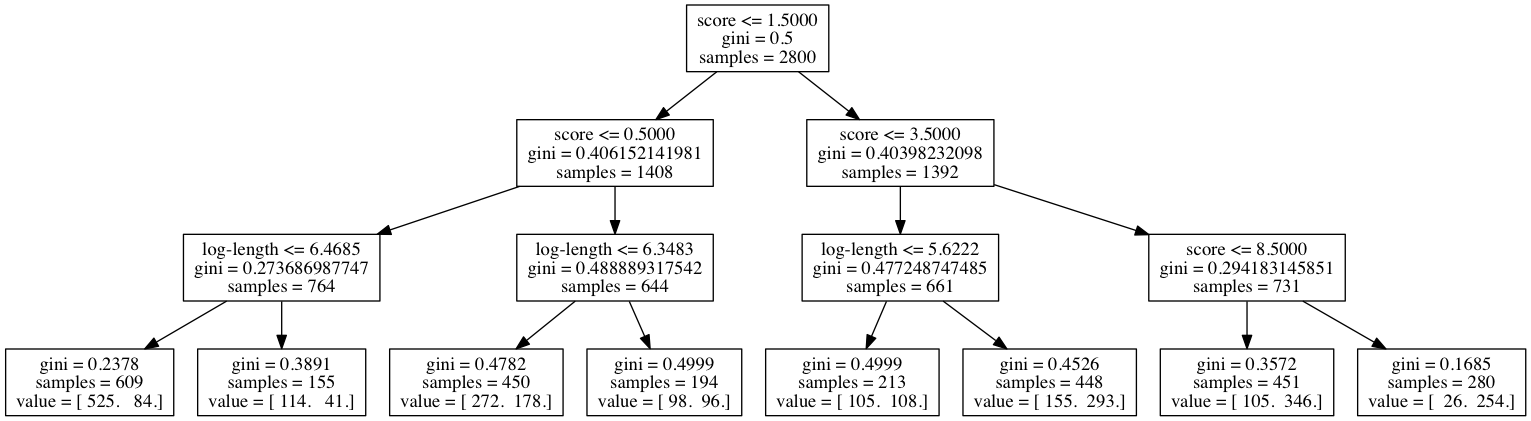

In [31]:
from IPython.display import Image 
from sklearn.externals.six import StringIO
import pydot

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, Y)
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=['log-length', 'score'])  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [32]:
# A few tests on the model
a1=so.questions[100].acceptedAnswer
a2=so.questions[200].acceptedAnswer
a3=so.questions[300].acceptedAnswer
una1=so.questions[100].answers[0]
una2=so.questions[100].answers[5]
p1=clf.predict([math.log(len(a1.text)),a1.score])
p2=clf.predict([math.log(len(a2.text)),a2.score])
p3=clf.predict([math.log(len(a3.text)),a3.score])
p4=clf.predict([math.log(len(una1.text)),una1.score])
p5=clf.predict([math.log(len(una2.text)),una2.score])
print(p1)
print(p2)
print(p3)
print(p4)
print(p5)

#all accurate predictions

[1]
[1]
[1]
[0]
[0]
